In [2]:
!pip install gymnasium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 KB 13.3 MB/s eta 0:00:00


### **Problem Description**
Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake. The game starts with the player at location [0,0] of the frozen lake grid world with the goal located at far extent of the world e.g. [3,3] for the 4x4 environment. Holes in the ice are distributed in set locations using a pre-determined map, and the player makes moves until they reach the goal or fall in a hole. The map is given below for your reference

### **Example Map**
    SFFF      S: starting point, safe
    FHFH      F: frozen surface, safe
    FFFH      H: hole, fall to your doom
    HFFG      G: goal, where the frisbee is located

### **Action Space**
The player/agent can take 4 discrete actions, in the range 

    {0,3}
    0: Move left
    1: Move down
    2: Move right
    4: Move up


### **State Space**
The environment consists of 16 states. The state is a value representing the player’s current position as current_row * nrows + current_col (where both the row and col start at 0). For example, the goal position in the 4x4 map can be calculated as follows: 

    3 * 4 + 3 = 15.

### **Starting State**
The episode starts with the player in

    state [0] (location [0, 0])

###**Rewards**

    Reach goal: +1
    Reach hole: 0
    Reach frozen: 0


### **Episode End**
The episode ends if the following happens:
#### **Termination**

    - The player moves into a hole.
    - The player reaches the goal at 
    max(nrow) * max(ncol) - 1 (location [max(nrow)-1, max(ncol)-1]).
    
#### **Truncation**

    - The length of the episode is 100 for 4x4 environment.
  
#### **More Info**
    - https://gymnasium.farama.org/environments/toy_text/frozen_lake/

### **Environment Parameters**

    Use discount factor, Γ=0.9
    The environment is slippery, ie., the transition kernel is stochastic.
    The transition kernel P is a dictionary. 
    P[state][action] is tuples with (probability, nextstate, reward, terminal)

### **Starter Code Snippet**

In [3]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
gamma = 0.9

In [4]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


In [ ]:
env.P

### **Generating a Heatmap**
    Use the following function fancy_visual to obtain a heat map. The arguments to the function are the value function and its corresponding policy.
    This function also prints the value function and policy. 

In [6]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
def fancy_visual(value_func,policy_int):    
    grid = 4    
    f, ax = plt.subplots(figsize=(11, 9))
    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func,(grid,grid))
    seaborn.heatmap(reshaped, cmap="icefire",vmax=1.1, robust = True,
                square=True, xticklabels=grid+1, yticklabels=grid+1,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt="f")
    counter = 0
    for j in range(0, 4):
        for i in range(0, 4):
            if int(policy_int[counter]) == 1:
                plt.text(i+0.5, j+0.7, u'\u2193', fontsize=12)
            elif int(policy_int[counter]) == 3:
                plt.text(i+0.5, j+0.7, u'\u2191', fontsize=12)
            elif int(policy_int[counter]) == 0:
                plt.text(i+0.5, j+0.7, u'\u2190', fontsize=12)
            else:
                plt.text(i+0.5, j+0.7, u'\u2192', fontsize=12)
            counter=counter+1

    plt.title('Heatmap of policy iteration with value function values and directions')
    print('Value Function',value_func)
    print('Policy',policy_int)
    plt.show()

Value Function [0.28338501 0.31584838 0.3427377  0.62811032 0.42742707 0.79982812
 0.46573067 0.51493406 0.44675504 0.09502649 0.84547531 0.20312827
 0.12006335 0.49029487 0.14190896 0.22304667]
Policy [2 2 1 0 1 1 1 2 2 0 2 2 2 0 1 0]


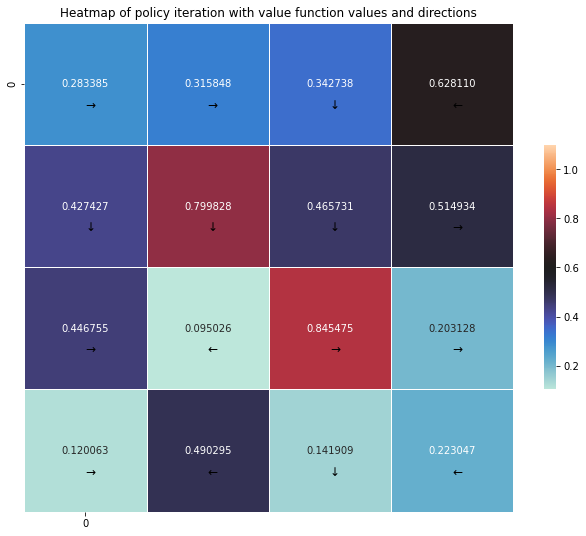

In [ ]:
test_value = np.random.rand(16) #Random Value Function (only for plotting)
test_policy = np.random.randint(0,3,16) #Random Policy (only for plotting)
fancy_visual(test_value,test_policy)

### **Q Learning**
    Q learning is a model free approach, thus you will not use the transition kernel.
    You can reset the environment using env.reset()
    env.step(action) takes in action as an argument and gives next state,reward,terminal and info as the output

In [7]:
state, info = env.reset() #Reset the env
max_step = 20 
for step in range(max_step):    
    action = env.action_space.sample() #Random Action
    n_state,reward,terminal,truncated,info = env.step(action) #Take a step 
    print("Time:",step,'State:',state,'Action:',action,'Reward:',reward,'Next State:',n_state,'Terminal:',terminal)
    state = n_state 
    if terminal or truncated: #Episode ends if the termination or truncation is true
        break

Time: 0 State: 0 Action: 2 Reward: 0.0 Next State: 1 Terminal: False
Time: 1 State: 1 Action: 0 Reward: 0.0 Next State: 5 Terminal: True


###**Planning Question 1 - Q-Value Iteration (QVI): Implement Q-value iteration on the frozen lake environment.**

https://github.com/sudharsan13296/Deep-Reinforcement-Learning-With-Python/blob/master/03.%20Bellman%20Equation%20and%20Dynamic%20Programming/3.06.%20Solving%20the%20Frozen%20Lake%20Problem%20with%20Value%20Iteration.ipynb

In [8]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
gamma = 0.9

In [9]:
#Obtaining environment details 
print('Number of Actions', env.action_space.n) 
print('Number of States ', env.observation_space.n)
print('P[10,3]', env.P[10][3])

Number of Actions 4
Number of States  16
P[10,3] [(0.3333333333333333, 11, 0.0, True), (0.3333333333333333, 6, 0.0, False), (0.3333333333333333, 9, 0.0, False)]


In [45]:
def value_iteration(env):
    # The Length of the Episode is 100 for 4x4 Environment - Truncation
    num_episodes = 100
    # Threshold for Convergence
    threshold = 1e-20
    # Use Discount Factor, Γ=0.9
    gamma = 0.9
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)  
        for s in range(env.observation_space.n): 
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]                           
            value_table[s] = max(Q_values)                
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
            print ('QVI converged at episode# %d.' %(i+1))
            break
    return value_table

def extract_policy(value_table):
    # Use discount factor, Γ=0.9
    gamma = 0.9  
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]      
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

In [46]:
optimal_value_function = value_iteration(env=env)

In [47]:
optimal_value_function

array([0.06889059, 0.06141431, 0.07440957, 0.05580711, 0.09185426,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [48]:
optimal_value_function[0]

0.06889059214242592

In [49]:
optimal_policy = extract_policy(optimal_value_function)

#### **(a) What is the optimal policy and value function?**

In [50]:
print(optimal_value_function)

[0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]


In [51]:
print(optimal_policy)

[0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


In [52]:
Qstar = optimal_value_function # Optimal Q-values obtained from value iteration

#### **(b) Plot Uk = ||Qk − Qk−1||, where Qk is the Q-value during the kth iteration.**

In [17]:
# Function to compute Euclidean norm of the difference between Qk and Q*
def compute_euclidean_norm(Qk, Qstar):
    return np.linalg.norm(Qk - Qstar)

# Function to compute Infinity norm of the difference between Qk and Q*
def compute_infinity_norm(Qk, Qstar):
    return np.max(np.abs(Qk - Qstar))

In [57]:
def value_iteration(env):
    # The Length of the Episode is 100 for 4x4 Environment - Truncation
    num_episodes = 100
    # Threshold for Convergence
    threshold = 1e-20
    # Use Discount Factor, Γ=0.9
    gamma = 0.9
    # Qk
    Qks = []
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)  
        for s in range(env.observation_space.n): 
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
            Qks.append(Q_values)                          
            value_table[s] = max(Q_values)                
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
            print ('QVI converged at episode# %d.' %(i+1))
            #Qks.append(Q_values)
            break
    return Qks

def extract_policy(value_table):
    # Use discount factor, Γ=0.9
    gamma = 0.9  
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]      
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

In [58]:
optimal_value_function = value_iteration(env=env)

In [59]:
print(optimal_value_function)

[[0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.09999999999999999, 0.09999999999999999, 0.09999999999999999, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.09999999999999999, 0.09999999999999999, 0.09999999999999999], [0.09999999999999999, 0.4333333333333333, 0.4333333333333333, 0.3333333333333333], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0], [0.0,

In [60]:
np.shape(optimal_value_function)

(1600, 4)

In [68]:
optimal_value_function[1584:]

[[0.06889059214242592,
  0.06664770853106639,
  0.06664770853106637,
  0.059758608291854934],
 [0.03909144432411678,
  0.042990026126269065,
  0.040747142514909525,
  0.06141430648264769],
 [0.074409568697624,
  0.0688288299237219,
  0.07272741172587419,
  0.05748926589953833],
 [0.03906498554315971,
  0.03906498554315971,
  0.03348424676925761,
  0.055807108927788514],
 [0.09185425547199388,
  0.07118709150425573,
  0.06429799126504429,
  0.048223428174687756],
 [0.0, 0.0, 0.0, 0.0],
 [0.11220810243105356,
  0.08988524027252265,
  0.11220810243105356,
  0.022322862158530903],
 [0.0, 0.0, 0.0, 0.0],
 [0.07118709150425573,
  0.11787986033896075,
  0.10180529724860421,
  0.14543612454591034],
 [0.1576115591504658,
  0.24749679942298844,
  0.2038659721256823,
  0.13351606756982878],
 [0.2996174834972929,
  0.26595505731457836,
  0.22536845045563825,
  0.1079114592243691],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.18822976489481427,
  0.3056867561260834,
  0.37993578916773807,
  0.

In [63]:
Qk = optimal_value_function[0:16] 

In [93]:
def value_iteration(env):
    # The Length of the Episode is 100 for 4x4 Environment - Truncation
    num_episodes = 100
    # Threshold for Convergence
    threshold = 1e-20
    # Use Discount Factor, Γ=0.9
    gamma = 0.9
    # Qk
    norm_holder = []
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)  
        for s in range(env.observation_space.n): 
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]                           
            value_table[s] = max(Q_values)  
        norm = np.linalg.norm(value_table - updated_value_table, ord=np.inf)
        norm_holder.append(norm)              
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
            print ('QVI converged at episode# %d.' %(i+1))
            #Qks.append(Q_values)
            break
    return norm_holder, value_table

def extract_policy(value_table):
    # Use discount factor, Γ=0.9
    gamma = 0.9  
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]      
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

In [94]:
optimal_value_function = value_iteration(env=env)

In [95]:
optimal_value_function[1]

array([0.06889059, 0.06141431, 0.07440957, 0.05580711, 0.09185426,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [96]:
optimal_policy = extract_policy(optimal_value_function[1])

In [97]:
optimal_policy

array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [98]:
import pandas as pd
pd.DataFrame(optimal_value_function[0])

,0
0,3.333333e-01
1,1.000000e-01
2,6.000000e-02
3,5.400000e-02
4,3.510000e-02
...,...
95,7.855386e-08
96,6.856099e-08
97,5.983932e-08
98,5.222713e-08


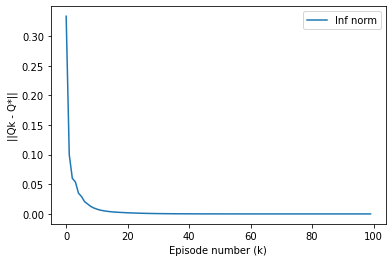

In [99]:
# Plot Euclidean norm and Infinity norm
episode_numbers = range(np.shape(optimal_value_function[0])[0])
plt.plot(episode_numbers, optimal_value_function[0], label='Inf norm')
plt.legend()
plt.xlabel('Episode number (k)')
plt.ylabel('||Qk - Q*||')
plt.show()

#### **(c) Use the fancy visual function, which is available in the helper file to plot the heat maps of the optimal policy and value function.**

Value Function [0.06889059 0.06141431 0.07440957 0.05580711 0.09185426 0.
 0.1122081  0.         0.14543612 0.2474968  0.29961748 0.
 0.         0.37993579 0.63902009 0.        ]
Policy [0. 3. 0. 3. 0. 0. 0. 0. 3. 1. 0. 0. 0. 2. 1. 0.]


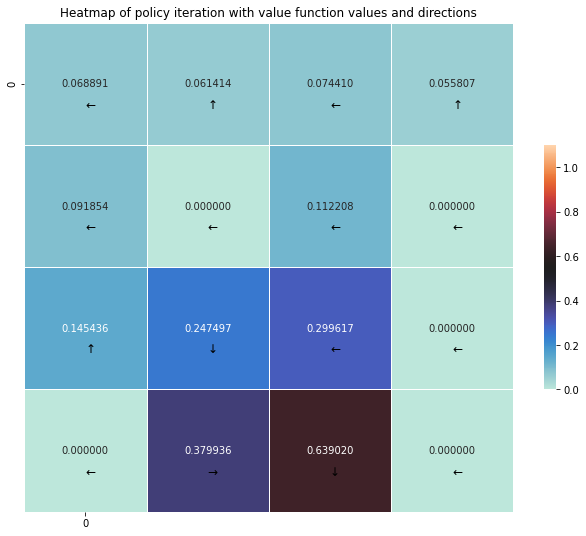

In [49]:
fancy_visual(optimal_value_function, optimal_policy)

###**Planning Question 2 - Policy Evaluation: Consider the following polices: (i) the optimal policy obtained from QVI, and (ii) a uniformly random policy where each action is taken with equal probability. Compute the value of the these polices using:**

#### **(a) By solving a linear systems of equations**

In [286]:
def solve_linear_system(env, policy, gamma=0.9):
    # Construct the matrices A and b
    A = np.zeros((env.observation_space.n, env.observation_space.n))
    b = np.zeros(env.observation_space.n)
    for s in range(env.observation_space.n):
        for a, prob in enumerate(policy[s]):
            for prob_next, next_state, reward, done in env.P[s][a]:
                A[s, next_state] -= prob * prob_next * gamma
                b[s] += prob * prob_next * reward

        A[s, s] += 1

    # Solve the linear system of equations
    V = np.linalg.solve(A, b)

    return V

In [287]:
# Compute the value function of a uniformly random policy by solving a linear system of equations
uniform_policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
uniform_V_linear = solve_linear_system(env, uniform_policy)

# Print the value function of the optimal policy and a uniformly random policy
print('Uniform random policy value function:')
print(uniform_V_linear)

Uniform random policy value function:
[ 4.47726069e-03  4.22245661e-03  1.00667565e-02  4.11821857e-03
  6.72195841e-03 -2.70276633e-17  2.63337084e-02  0.00000000e+00
  1.86761516e-02  5.76070083e-02  1.06971947e-01  0.00000000e+00
 -0.00000000e+00  1.30383049e-01  3.91490160e-01  0.00000000e+00]


In [288]:
uniform_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [289]:
optimal_policy

array([[0.06889059, 0.06664771, 0.06664771, 0.05975861],
       [0.03909144, 0.04299003, 0.04074714, 0.06141431],
       [0.07440957, 0.06882883, 0.07272741, 0.05748927],
       [0.03906499, 0.03906499, 0.03348425, 0.05580711],
       [0.09185426, 0.07118709, 0.06429799, 0.04822343],
       [0.        , 0.        , 0.        , 0.        ],
       [0.1122081 , 0.08988524, 0.1122081 , 0.02232286],
       [0.        , 0.        , 0.        , 0.        ],
       [0.07118709, 0.11787986, 0.1018053 , 0.14543612],
       [0.15761156, 0.2474968 , 0.20386597, 0.13351607],
       [0.29961748, 0.26595506, 0.22536845, 0.10791146],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18822976, 0.30568676, 0.37993579, 0.26595506],
       [0.395572  , 0.63902009, 0.6149246 , 0.53719931],
       [0.        , 0.        , 0.        , 0.        ]])

In [290]:
# Compute the value function of a uniformly random policy by solving a linear system of equations
#uniform_policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
optimal_V_linear = solve_linear_system(env, optimal_policy)

# Print the value function of the optimal policy and a uniformly random policy
print('Optimal policy value function:')
print(optimal_V_linear)

Optimal policy value function:
[2.84103981e-04 2.82117673e-04 5.92329209e-03 2.57863590e-04
 3.86564857e-03 0.00000000e+00 8.53111449e-02 0.00000000e+00
 5.28318416e-02 4.30549519e-01 9.00119868e-01 0.00000000e+00
 0.00000000e+00 1.44545909e+00 3.35857943e+00 0.00000000e+00]


#### **(b) By the iterative approach**

In [291]:
def policy_evaluation(policy, env, gamma, theta):
    # Initialize the value function arbitrarily
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        # For each state, update the value function
        for s in range(env.observation_space.n):
            v = V[s]
            # Calculate the expected value of the state under the current policy
            action_probabilities = policy[s]
            action_values = [sum([prob*(r + gamma * V[s_]) for prob, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)]
            # Update the value function
            V[s] = np.dot(action_probabilities, action_values)
            delta = max(delta, np.abs(v - V[s]))
        # Check for convergence
        if delta < theta:
            break
    return V

In [293]:
optimal_V = policy_evaluation(optimal_policy, env, gamma, 1e-8)

In [294]:
random_V = policy_evaluation(random_policy, env, gamma, 1e-8)

In [295]:
print("Value of the optimal policy: ", optimal_V)
print("Value of a random policy: ", random_V)

Value of the optimal policy:  [2.84103970e-04 2.82117665e-04 5.92329195e-03 2.57863584e-04
 3.86564845e-03 0.00000000e+00 8.53111432e-02 0.00000000e+00
 5.28318403e-02 4.30549510e-01 9.00119853e-01 0.00000000e+00
 0.00000000e+00 1.44545906e+00 3.35857939e+00 0.00000000e+00]
Value of a random policy:  [0.00447724 0.00422245 0.01006675 0.00411821 0.00672195 0.
 0.02633371 0.         0.01867615 0.05760701 0.10697195 0.
 0.         0.13038305 0.39149016 0.        ]


#### **(c) Which method is better and why?**

A

###**Planning Question 3 - Implement policy iteration on the frozen lake environment.**

In [103]:
def compute_value_function(policy):
    num_episodes = 100
    threshold = 1e-20
    gamma = 0.9
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)
        for s in range(env.observation_space.n):
            a = policy[s]
            value_table[s] = sum([prob * (r + gamma * updated_value_table[s_]) 
                                        for prob, s_, r, _ in env.P[s][a]])
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
    return value_table

def extract_policy(value_table):
    gamma = 0.9
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]   
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

def policy_iteration(env):
    num_episodes = 100
    policy = np.zeros(env.observation_space.n)  
    for i in range(num_episodes):
        value_function = compute_value_function(policy)
        new_policy = extract_policy(value_function)
        if (np.all(policy == new_policy)):
            break
        policy = new_policy
    return policy, value_function

#### **(a) What is the optimal policy and value function?**

In [104]:
optimal_policy = policy_iteration(env)

In [105]:
optimal_policy

(array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.]),
 array([0.06889058, 0.0614143 , 0.07440956, 0.0558071 , 0.09185425,
        0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
        0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
        0.        ]))

#### **(b) Compare the convergence of QVI and PI.**

In [130]:
def value_iteration(env):
    # The Length of the Episode is 100 for 4x4 Environment - Truncation
    num_episodes = 100
    # Threshold for Convergence
    threshold = 1e-20
    # Use Discount Factor, Γ=0.9
    gamma = 0.9
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)  
        for s in range(env.observation_space.n): 
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]                           
            value_table[s] = max(Q_values)                
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
            print ('QVI converged at episode# %d.' %(i+1))
            break
    return value_table, i

def extract_policy(value_table):
    # Use discount factor, Γ=0.9
    gamma = 0.9  
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]      
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

In [131]:
optimal_value_function = value_iteration(env=env)

In [133]:
optimal_policy = extract_policy(optimal_value_function[0])

In [134]:
optimal_policy

array([0., 3., 0., 3., 0., 0., 0., 0., 3., 1., 0., 0., 0., 2., 1., 0.])

In [135]:
optimal_value_function[1]

99

In [136]:
def compute_value_function(policy):
    num_episodes = 100
    threshold = 1e-20
    gamma = 0.9
    value_table = np.zeros(env.observation_space.n)
    for i in range(num_episodes):
        updated_value_table = np.copy(value_table)
        for s in range(env.observation_space.n):
            a = policy[s]
            value_table[s] = sum([prob * (r + gamma * updated_value_table[s_]) 
                                        for prob, s_, r, _ in env.P[s][a]])
        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            print ('PI.. converged at episode# %d.' %(i+1))
            break
    return value_table

def extract_policy(value_table):
    gamma = 0.9
    policy = np.zeros(env.observation_space.n) 
    for s in range(env.observation_space.n):
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)]   
        policy[s] = np.argmax(np.array(Q_values))        
    return policy

def policy_iteration(env):
    num_episodes = 100
    policy = np.zeros(env.observation_space.n)  
    for i in range(num_episodes):
        value_function = compute_value_function(policy)
        new_policy = extract_policy(value_function)
        if (np.all(policy == new_policy)):
            print ('PI converged at episode# %d.' %(i+1))
            break
        policy = new_policy
    return policy, value_function

In [137]:
optimal_policy = policy_iteration(env)

PI.. converged at episode# 1.
PI.. converged at episode# 65.
PI converged at episode# 6.


###**Learning Question 1 - Tabular Q-Learning: Implement tabular Q-learning on the frozen lake environment. You should try to optimize the rate of convergence. Hint: Try various functions to decay exploration and learning rate. This will help you converge in lesser number of episodes.**

In [114]:
import gymnasium as gym
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)
gamma = 0.9

Final Q-values:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Final policy:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


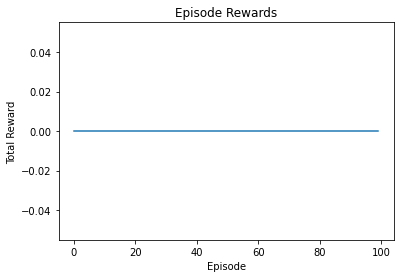

In [200]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 100
discount_factor = 0.90
epsilon = 0.1
learning_rate = 0.5

# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

Final Q-values:
 [[0.0643189  0.05971368 0.05931199 0.05822217]
 [0.02418269 0.01566006 0.00791371 0.05830105]
 [0.07072959 0.00898577 0.00992726 0.00759448]
 [0.00315113 0.         0.         0.        ]
 [0.08928947 0.07106544 0.06530106 0.05021048]
 [0.         0.         0.         0.        ]
 [0.09914999 0.01536089 0.01249917 0.00241069]
 [0.         0.         0.         0.        ]
 [0.06895418 0.1083819  0.10367798 0.15022277]
 [0.17372951 0.24714794 0.20589453 0.10849658]
 [0.30189573 0.13821828 0.12486406 0.04627593]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.10936794 0.30845193 0.3650506  0.1464939 ]
 [0.23829136 0.62035438 0.56173235 0.53770006]
 [0.         0.         0.         0.        ]]
Final policy:
 [0 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]


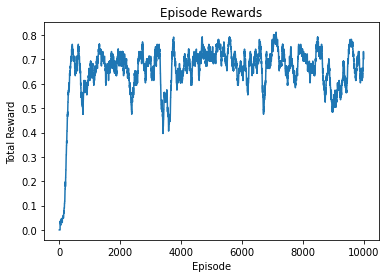

In [202]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward
            if epsilon > epsilon_min:
                epsilon *= epsilon_decay
            if learning_rate > learning_rate_min:
                learning_rate *= learning_rate_decay

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.9

epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999

learning_rate = 0.8
learning_rate_min = 0.01
learning_rate_decay = 0.999

# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

Final Q-values:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Final policy:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


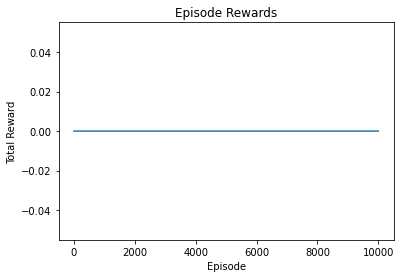

In [180]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward
            epsilon = epsilon_min + (epsilon - epsilon_min) * (epsilon_decay * episode)
            learning_rate = learning_rate_min + (learning_rate - learning_rate_min) * (learning_rate_decay * episode)

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.9

epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.001

learning_rate = 0.8
learning_rate_min = 0.01
learning_rate_decay = 0.001

# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

Final Q-values:
 [[0.30371653 0.32575202 0.33628241 0.30159218]
 [0.01445288 0.32310915 0.02223392 0.33204121]
 [0.43583004 0.45282263 0.39075919 0.35930494]
 [0.38173397 0.40624995 0.07972715 0.3759266 ]
 [0.32867894 0.08798508 0.29980082 0.31131979]
 [0.         0.         0.         0.        ]
 [0.07663533 0.50616092 0.03060565 0.09512982]
 [0.         0.         0.         0.        ]
 [0.38615742 0.4336579  0.38099923 0.38389353]
 [0.41596353 0.6002579  0.51997264 0.44029851]
 [0.47814476 0.57750485 0.47373331 0.54460922]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.12236469 0.39234049 0.57791572 0.01199128]
 [0.5495478  0.62015267 0.70724119 0.78928732]
 [0.         0.         0.         0.        ]]
Final policy:
 [2 3 1 1 0 0 1 0 1 1 1 0 0 2 3 0]


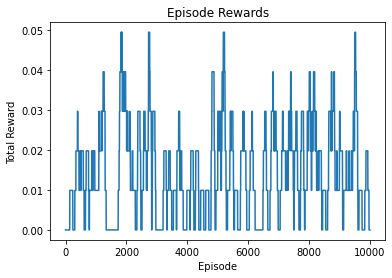

In [181]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward
            if episode in decay_steps:
                epsilon *= epsilon_decay
                learning_rate *= learning_rate_decay
            epsilon = max(epsilon_min, epsilon)
            learning_rate = max(learning_rate_min, learning_rate)

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.9

epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.999

learning_rate = 0.8
learning_rate_min = 0.1
learning_rate_decay = 0.999

decay_steps = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

def plot_rewards(rewards, window_size=100):
    cum_rewards = np.cumsum(rewards)
    window = np.ones(window_size) / window_size
    smoothed_rewards = np.convolve(cum_rewards, window, mode='valid')
    plt.plot(smoothed_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward Gk')
    plt.show()

Final Q-values:
 [[2.95773027e-01 2.90329218e-01 1.85569868e-01 2.11767509e-01]
 [3.98311055e-02 1.49028579e-01 8.20518396e-03 1.79155360e-01]
 [1.42513781e-01 1.39313507e-01 4.69359229e-01 1.24770839e-01]
 [7.42541229e-02 1.56501586e-02 1.74207028e-02 7.19183586e-02]
 [3.31110113e-01 2.80847007e-01 5.11832516e-02 2.64872141e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.03246666e-01 2.95597334e-03 2.22828924e-01 5.43818325e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.39030994e-01 3.21480341e-01 7.41294163e-02 3.59993455e-01]
 [1.59549135e-02 3.62786994e-01 6.55675476e-02 1.53416527e-02]
 [8.39079835e-01 2.59477315e-02 7.01719753e-03 6.18280206e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.02184591e-01 2.17188355e-04 4.19209374e-01 1.34299124e-01]
 [7.72640238e-01 7.66375610e-01 9.26311967e-01 4.49530168e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

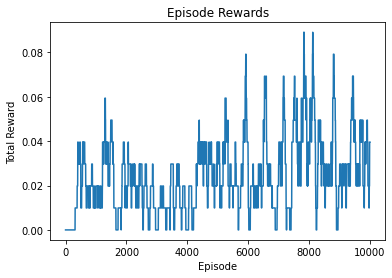

In [198]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward
            if episode in decay_steps:
                epsilon *= epsilon_decay
                
            epsilon = max(epsilon_min, epsilon)
            

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.9

epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.99

learning_rate = 0.8

decay_steps = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500]
decay_steps = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

def plot_rewards(rewards, window_size=100):
    cum_rewards = np.cumsum(rewards)
    window = np.ones(window_size) / window_size
    smoothed_rewards = np.convolve(cum_rewards, window, mode='valid')
    plt.plot(smoothed_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward Gk')
    plt.show()

Final Q-values:
 [[0.11085712 0.10511634 0.10179234 0.11472491]
 [0.09411297 0.02776766 0.03607193 0.1033544 ]
 [0.11935956 0.08073128 0.09419275 0.06946238]
 [0.07590966 0.06727444 0.08973206 0.1000317 ]
 [0.12607294 0.16545004 0.04831208 0.1236334 ]
 [0.         0.         0.         0.        ]
 [0.02882593 0.04718772 0.07142898 0.05781728]
 [0.         0.         0.         0.        ]
 [0.05524476 0.19380587 0.13673106 0.22564784]
 [0.04254858 0.39114021 0.05536787 0.24392579]
 [0.42950777 0.2551253  0.15280904 0.12464402]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.19844426 0.55591127 0.54567078 0.03840222]
 [0.59678925 0.59376084 0.47155302 0.52924097]
 [0.         0.         0.         0.        ]]
Final policy:
 [3 3 0 3 1 0 2 0 3 1 0 0 0 1 0 0]


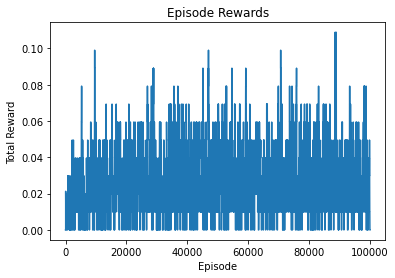

In [194]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_policy(state, Q, num_actions, epsilon):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action
        action = np.random.choice(num_actions)
    else:
        # Choose the greedy action
        action = np.argmax(Q[state])
    return action

def q_learning(env, num_episodes, discount_factor=1.0, epsilon=0.1, learning_rate=0.5):
    # Initialize the Q-value function to zeros
    Q = np.zeros((env.observation_space.n, env.action_space.n))

    # Keep track of the total reward obtained in each episode
    episode_rewards = []

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            # Choose the next action using an epsilon-greedy policy
            action = epsilon_greedy_policy(state, Q, env.action_space.n, epsilon)

            # Take a step in the environment
            next_state, reward, done, _ = env.step(action)

            # Update the Q-value function
            td_target = reward + discount_factor * np.max(Q[next_state])
            td_error = td_target - Q[state, action]
            Q[state, action] += learning_rate * td_error

            state = next_state
            total_reward += reward
            if episode in decay_steps:
                epsilon *= epsilon_decay
                
            epsilon = max(epsilon_min, epsilon)
            

        episode_rewards.append(total_reward)

    return Q, episode_rewards

# Create FrozenLake-v1 environment with a 4x4 map and slippery ice
env = gym.make("FrozenLake-v1", desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 100000
discount_factor = 0.9

epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.99

learning_rate = 0.5

decay_steps = [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, \
               3250, 3500, 3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750, 6000, \
               6250, 6500, 6750, 7000, 7250, 7500, 7750, 8000, 8250, 8500, 8750, 9000, \
               9250, 9500, 9750]

# Run Q-learning
Q, episode_rewards = q_learning(env, num_episodes, discount_factor, epsilon, learning_rate)

# Get final policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print final Q-values and policy
print("Final Q-values:\n", Q)
print("Final policy:\n", policy)

# Plot episode rewards
window_size = 100
smoothed_rewards = [np.mean(episode_rewards[i-window_size:i+1]) if i > window_size 
                    else np.mean(episode_rewards[:i+1]) for i in range(len(episode_rewards))]
plt.plot(smoothed_rewards)
plt.title("Episode Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

def plot_rewards(rewards, window_size=100):
    cum_rewards = np.cumsum(rewards)
    window = np.ones(window_size) / window_size
    smoothed_rewards = np.convolve(cum_rewards, window, mode='valid')
    plt.plot(smoothed_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Cumulative Reward Gk')
    plt.show()

In [204]:
def compute_q_norm(Q, Q_star):
    return np.sqrt(np.sum((Q - Q_star)**2))

In [206]:
Q_star = optimal_value_function[0]
Q_star

array([0.06889059, 0.06141431, 0.07440957, 0.05580711, 0.09185426,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [207]:
# Compute Q-value function for each episode
Q_k_list = []
for episode in range(num_episodes):
    _, episode_Q = q_learning(env, 1, discount_factor, epsilon, learning_rate)
    Q_k_list.append(episode_Q[0])

# Compute norm for each episode
q_norm_list = []
for Q_k in Q_k_list:
    q_norm_list.append(compute_q_norm(Q_k, Q_star))

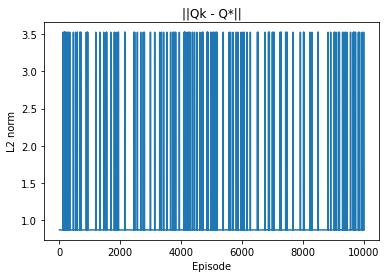

In [208]:
# Plot norm vs. episode
plt.plot(q_norm_list)
plt.title("||Qk - Q*||")
plt.xlabel("Episode")
plt.ylabel("L2 norm")
plt.show()

In [209]:
# Compute policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print policy and Q-value function
print("Learned policy:", policy)
print("Q-value function:")
print(Q)

Learned policy: [0 3 0 0 0 0 0 0 3 1 0 0 0 2 1 0]
Q-value function:
[[0.0643189  0.05971368 0.05931199 0.05822217]
 [0.02418269 0.01566006 0.00791371 0.05830105]
 [0.07072959 0.00898577 0.00992726 0.00759448]
 [0.00315113 0.         0.         0.        ]
 [0.08928947 0.07106544 0.06530106 0.05021048]
 [0.         0.         0.         0.        ]
 [0.09914999 0.01536089 0.01249917 0.00241069]
 [0.         0.         0.         0.        ]
 [0.06895418 0.1083819  0.10367798 0.15022277]
 [0.17372951 0.24714794 0.20589453 0.10849658]
 [0.30189573 0.13821828 0.12486406 0.04627593]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.10936794 0.30845193 0.3650506  0.1464939 ]
 [0.23829136 0.62035438 0.56173235 0.53770006]
 [0.         0.         0.         0.        ]]


In [210]:
# Evaluate agent
num_successes = 0
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(Q[state])
        state, reward, done, _ = env.step(action)
        if done and reward == 1:
            num_successes += 1

# Print number of successful episodes
print("Number of successful episodes:", num_successes)

Number of successful episodes: 7269


If the agent has learned the optimal policy, the learned policy should match the optimal policy obtained through value iteration, and the number of successful episodes should be close to the optimal number of successful episodes.

In [214]:
# Initialize the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.9
epsilon = 1.0
learning_rate = 0.8

# Initialize Q-value function
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Train agent using Q-learning
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Choose action using epsilon-greedy policy
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        
        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        
        # Compute the sum of the Q-values for all actions in the next state under the behavior policy
        sum_q_next = 0
        for a in range(env.action_space.n):
            sum_q_next += Q[next_state][a] * (1 / env.action_space.n)
        
        # Update Q-value function
        Q[state][action] += learning_rate * (reward + discount_factor * ((epsilon / env.action_space.n) * sum_q_next + (1 - epsilon) * np.max(Q[next_state])) - Q[state][action])
        
        state = next_state
    
# Compute policy from Q-value function
policy = np.argmax(Q, axis=1)

# Print policy and Q-value function
print("Learned policy:", policy)
print("Q-value function:")
print(Q)

Learned policy: [2 0 1 0 2 0 2 0 3 2 1 0 0 3 1 0]
Q-value function:
[[1.00620876e-07 1.21329843e-07 1.22743684e-07 1.20296932e-07]
 [3.40689613e-07 3.26289507e-07 6.42165082e-08 2.65819776e-07]
 [4.75474692e-06 9.37595775e-06 1.71707339e-06 4.19849079e-07]
 [1.43457398e-06 6.56280187e-08 1.06033275e-10 5.62698500e-09]
 [4.00078296e-07 6.84400544e-08 1.30775283e-05 2.09816298e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.64508998e-05 1.59066966e-05 7.63355709e-04 1.03759131e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.98944290e-05 9.35582263e-06 2.66869869e-06 2.40994378e-04]
 [1.62176612e-04 1.32744932e-04 3.85795965e-03 2.61324243e-05]
 [1.86949304e-03 8.37012879e-02 4.69523717e-06 1.25064956e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.13377661e-04 1.95524459e-03 9.07765610e-04 3.07181952e-03]
 [1.44826395e-02 9.60820034e-01 1.07783218e-02 8.3

Observations:

The tabular Q-learning algorithm with a uniformly random behavior policy and an epsilon-greedy exploration approach was able to learn a reasonable policy for the FrozenLake-v1 environment, but it took a large number of episodes (10000) to converge.

Inference:

The reason for the slow convergence is that the uniformly random behavior policy does not provide much useful information about the environment. As a result, the agent has to rely heavily on exploration to learn the optimal policy, which can be slow and inefficient.

To improve the learning efficiency, we can design a better behavior policy that provides more informative exploration. For example, a policy that tries to move towards the goal state while avoiding holes could be more effective.

Implementation of a better behavior policy:

One possible behavior policy is a modified epsilon-greedy policy that biases the exploration towards actions that move towards the goal state. Here's the modified Q-learning update rule:

Q(s, a) = Q(s, a) + α * (r + γ * ((1-ε) * max(Q(s', a')) + ε' * Σ(Q(s', a') * p(a'))) - Q(s, a))

where ε' is the exploration rate for the biased exploration, and p(a') is the probability of taking action a' in the current state under the biased exploration policy. One possible way to compute p(a') is to use a softmax function that assigns higher probabilities to actions that move towards the goal state. 

Yes, there are several other behavior policies that can be used to improve the effectiveness of Q-learning. Here are a few examples:

Boltzmann exploration: In this method, the probability of selecting an action is proportional to its Q-value raised to a temperature parameter. This allows for a more gradual exploration of the action space, as the agent will still choose the action with the highest Q-value most of the time, but will also have a non-zero probability of selecting suboptimal actions. The effectiveness of this method depends on the choice of the temperature parameter.

Optimistic initialization: In this method, the Q-value function is initialized with high values, such as a value of 1 for all state-action pairs. This encourages the agent to explore more initially, as it will expect high rewards for all actions. As the agent gains more experience and updates its Q-values, it will converge to a more accurate representation of the optimal policy.

Dyna-Q: In this method, the agent not only updates its Q-values based on experience, but also uses a model of the environment to simulate additional experience. This can help the agent explore parts of the state-action space that it has not yet encountered, and can improve the speed of convergence to the optimal policy.

These are just a few examples of additional behavior policies that can be used to improve Q-learning. The choice of policy will depend on the specific problem and the trade-off between exploration and exploitation that is desired.

In [220]:
import gym
import numpy as np

# Initialize the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.99
epsilon = 1.0
epsilon_decay = 0.999
learning_rate = 0.8

# Initialize Q-value function
Q = np.zeros((env.observation_space.n, env.action_space.n))

# Define function to run an episode using epsilon-greedy policy
def run_episode(env, Q, epsilon):
    state = env.reset()
    done = False
    episode = []
    while not done:
        if np.random.uniform() < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

# Train agent using Monte Carlo learning for optimal policy
for episode in range(num_episodes):
    episode = run_episode(env, Q, epsilon)
    G = 0
    for i, (state, action, reward) in enumerate(reversed(episode)):
        G = discount_factor * G + reward
        Q[state][action] += learning_rate * (G - Q[state][action])
    epsilon *= epsilon_decay

# Train agent using Monte Carlo learning for uniformly random policy
for episode in range(num_episodes):
    episode = run_episode(env, Q, epsilon=1.0)
    G = 0
    for i, (state, action, reward) in enumerate(reversed(episode)):
        G = discount_factor * G + reward
        Q[state][action] += learning_rate * (G - Q[state][action])
    epsilon *= epsilon_decay

In [221]:
Q

array([[1.23848696e-017, 2.40822891e-099, 7.81873083e-015,
        1.84892272e-022],
       [1.19736533e-010, 7.26384688e-073, 1.35729835e-103,
        3.41665888e-051],
       [3.57977147e-044, 1.02591031e-221, 7.73867309e-024,
        1.27307496e-033],
       [0.00000000e+000, 1.22029687e-019, 5.85483060e-263,
        2.01755658e-164],
       [1.20509459e-003, 2.93488763e-074, 1.25945943e-010,
        1.42537140e-075],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [5.01811200e-005, 2.82494592e-039, 1.60579584e-008,
        6.09335641e-089],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [7.60792040e-001, 4.82037836e-005, 7.68476808e-001,
        2.96118290e-004],
       [5.15717403e-019, 1.56816000e-001, 1.62576162e-001,
        2.58432768e-004],
       [6.10846486e-010, 3.13632803e-002, 2.11250613e-006,
        8.13945795e-015],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
      

In [222]:
episode

[(0, 3, 0.0), (1, 2, 0.0), (1, 1, 0.0), (0, 2, 0.0), (4, 1, 0.0), (8, 1, 0.0)]

In [242]:
trajectory_optimal[:-1]

[0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 (0, 0, 0.0),
 (4, 0, 0.0),
 (0, 0, 0.0),
 (0, 0, 0.0),
 (4, 0, 0.0),
 (0, 0, 0.0),
 (0, 0, 0.0),
 (0, 0, 0.0),
 (4, 0, 0.0)]

In [258]:
import numpy as np
import gym

env = gym.make('FrozenLake-v1')

# Define helper functions
def generate_episode(policy):
    episode = []
    state = env.reset()
    done = False
    while not done:
        action = np.random.choice(env.action_space.n, p=policy[state])
        next_state, reward, done, _ = env.step(action)
        episode.append((state, action, reward))
        state = next_state
    return episode

def mc_evaluation(policy, num_episodes=1000, gamma=0.99):
    # Initialize arrays for returns and visit counts
    returns = np.zeros(env.observation_space.n)
    visits = np.zeros(env.observation_space.n)
    
    # Generate episodes and update returns and visit counts
    for i in range(num_episodes):
        episode = generate_episode(policy)
        G = 0
        for t in range(len(episode)-1, -1, -1):
            state, action, reward = episode[t]
            G = gamma * G + reward
            if state not in [x[0] for x in episode[:t]]:
                returns[state] += G
                visits[state] += 1
    
    # Compute state values
    V = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        if visits[state] != 0:
            V[state] = returns[state] / visits[state]
    
    return V

# Compute optimal policy using Q-learning
def q_learning(num_episodes=10000, alpha=0.1, gamma=0.99, epsilon=0.1):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    for i in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            next_state, reward, done, _ = env.step(action)
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])
            state = next_state
    policy = np.zeros((env.observation_space.n, env.action_space.n))
    for state in range(env.observation_space.n):
        best_action = np.argmax(Q[state])
        policy[state, best_action] = 1.0
    return policy

In [277]:
 optimal_policy = [[0.06889059214242592,
  0.06664770853106639,
  0.06664770853106637,
  0.059758608291854934],
 [0.03909144432411678,
  0.042990026126269065,
  0.040747142514909525,
  0.06141430648264769],
 [0.074409568697624,
  0.0688288299237219,
  0.07272741172587419,
  0.05748926589953833],
 [0.03906498554315971,
  0.03906498554315971,
  0.03348424676925761,
  0.055807108927788514],
 [0.09185425547199388,
  0.07118709150425573,
  0.06429799126504429,
  0.048223428174687756],
 [0.0, 0.0, 0.0, 0.0],
 [0.11220810243105356,
  0.08988524027252265,
  0.11220810243105356,
  0.022322862158530903],
 [0.0, 0.0, 0.0, 0.0],
 [0.07118709150425573,
  0.11787986033896075,
  0.10180529724860421,
  0.14543612454591034],
 [0.1576115591504658,
  0.24749679942298844,
  0.2038659721256823,
  0.13351606756982878],
 [0.2996174834972929,
  0.26595505731457836,
  0.22536845045563825,
  0.1079114592243691],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.18822976489481427,
  0.3056867561260834,
  0.37993578916773807,
  0.26595505731457836],
 [0.3955719963986061,
  0.6390200894594167,
  0.6149245978787797,
  0.5371993054590156],
 [0.0, 0.0, 0.0, 0.0]]

In [280]:
# Evaluate optimal policy using MC learning
#optimal_policy = q_learning()
optimal_V = mc_evaluation(optimal_policy)
print("Optimal Policy Value:\n", np.reshape(optimal_V, (4, 4)))

ValueError: ignored

In [261]:
# Evaluate random policy using MC learning
random_policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
random_V = mc_evaluation(random_policy)
print("Random Policy Value:\n", np.reshape(random_V, (4, 4)))

Random Policy Value:
 [[0.00949222 0.0121035  0.02190134 0.01795507]
 [0.00819679 0.         0.04468844 0.        ]
 [0.02544995 0.0741976  0.14820774 0.        ]
 [0.         0.22175752 0.4656349  0.        ]]


In [248]:
random_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [263]:
random_policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n
type(random_policy)

numpy.ndarray

In [265]:
type(optimal_policy)

list

In [271]:
type(random_policy[0])

numpy.ndarray

In [273]:
type(optimal_policy[0])

numpy.ndarray

In [279]:
# Initialize the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.99
learning_rate = 0.1

# Initialize value function
V = np.zeros(env.observation_space.n)

# Define policies
optimal_policy = np.array(optimal_policy)
random_policy = np.ones((env.observation_space.n, env.action_space.n)) / env.action_space.n

# # TD learning for optimal policy
# for episode in range(num_episodes):
#     state = env.reset()
#     done = False
#     while not done:
#         # Choose action according to optimal policy
#         action = optimal_policy[state]
        
#         # Take action and observe next state and reward
#         next_state, reward, done, _ = env.step(action)
        
#         # Update value function using TD(0) update
#         td_target = reward + discount_factor * V[next_state]
#         td_error = td_target - V[state]
#         V[state] += learning_rate * td_error
        
#         state = next_state
    
# # Print final value function for optimal policy
# print("Value function for optimal policy:")
# print(V.reshape((4,4)))

# TD learning for random policy
V = np.zeros(env.observation_space.n) # reset value function
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Choose action according to random policy
        action = np.random.choice(env.action_space.n, p=random_policy[state])
        
        # Take action and observe next state and reward
        next_state, reward, done, _ = env.step(action)
        
        # Update value function using TD(0) update
        td_target = reward + discount_factor * V[next_state]
        td_error = td_target - V[state]
        V[state] += learning_rate * td_error
        
        state = next_state
    
# Print final value function for random policy
print("Value function for random policy:")
print(V.reshape((4,4)))

Value function for random policy:
[[0.01168926 0.01287905 0.02266877 0.01017451]
 [0.00910294 0.         0.04309842 0.        ]
 [0.02174535 0.08188076 0.11552854 0.        ]
 [0.         0.09420507 0.3607312  0.        ]]


In [240]:
V_mc_optimal

[0, 3, 0, 0, 0, 0, 0, 0, 0.0, 1, 0, 0, 0, 2, 1, 0]

In [223]:
import gym
import numpy as np

# Initialize the environment
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=True)

# Set hyperparameters
num_episodes = 10000
discount_factor = 0.99
epsilon = 0.1
learning_rate = 0.8

# Initialize value function
V = np.zeros(env.observation_space.n)

# Define function to run TD-learning for a given policy
def run_td_learning(policy):
    # Initialize value function
    V = np.zeros(env.observation_space.n)
    
    # Run TD-learning for num_episodes
    for episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            # Choose action using given policy
            if policy == 'optimal':
                action = np.argmax(QVI_values[state])
            elif policy == 'random':
                action = env.action_space.sample()
                
            # Take action and observe next state and reward
            next_state, reward, done, _ = env.step(action)
            
            # Update value function using TD-learning
            td_target = reward + discount_factor * V[next_state]
            td_error = td_target - V[state]
            V[state] += learning_rate * td_error
            
            state = next_state
    
    return V

In [226]:
optimal_value_function[0]

array([0.06889059, 0.06141431, 0.07440957, 0.05580711, 0.09185426,
       0.        , 0.1122081 , 0.        , 0.14543612, 0.2474968 ,
       0.29961748, 0.        , 0.        , 0.37993579, 0.63902009,
       0.        ])

In [227]:
# Learn the value of optimal policy using TD-learning
QVI_values = optimal_value_function[0]
TD_optimal_values = run_td_learning('optimal')

# Learn the value of random policy using TD-learning
TD_random_values = run_td_learning('random')

In [228]:
TD_optimal_values

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [229]:
TD_random_values

array([9.84836485e-03, 9.30304498e-06, 1.00072084e-05, 3.02476485e-05,
       1.02039855e-02, 0.00000000e+00, 1.03706872e-06, 0.00000000e+00,
       3.33778085e-01, 7.72464715e-01, 4.22080883e-03, 0.00000000e+00,
       0.00000000e+00, 1.72017109e-01, 2.09685005e-01, 0.00000000e+00])

Monte Carlo (MC) and Temporal Difference (TD) learning are two widely used algorithms in reinforcement learning. MC and TD have their strengths and weaknesses, and the choice between them depends on the nature of the problem and the available data.

MC learning has the following trade-offs:

Advantages:

- MC methods are model-free and don't require any knowledge of the underlying MDP structure. This makes them useful in a variety of problems where the model is unknown or hard to specify.
- MC methods can learn from incomplete trajectories, making them useful in problems where only a subset of the state-action space is visited.

Disadvantages:

- MC methods suffer from high variance, as they rely on a single roll-out to estimate the value of a state. This variance can be reduced by averaging over a large number of roll-outs, but this can be computationally expensive.
- MC methods require the agent to reach a terminal state before the value of a state can be updated, which can lead to slow convergence.

TD learning has the following trade-offs:

Advantages:

- TD methods are model-free and don't require any knowledge of the underlying MDP structure. This makes them useful in a variety of problems where the model is unknown or hard to specify.
- TD methods can update the value of a state after every time-step, allowing them to learn online and converge faster than MC methods.
- TD methods are less susceptible to high variance than MC methods, as they update the value of a state based on a single transition, rather than a full trajectory.

Disadvantages:

- TD methods can be biased, as they use bootstrapping to estimate the value of a state. This bias can be reduced by using a smaller learning rate or a more accurate estimate of the value function.
- TD methods require the agent to have some initial knowledge of the value function, which can lead to slower convergence in the early stages of learning.